In [1]:

%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
pd.options.display.mpl_style = 'default'

import inspect, os
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
os.sys.path.insert(0,parentdir) 
from src.dashboard_helpers import Test, custom_amount_stats
from src.data_retrieval import *



In [2]:
a = 'B14_1130_fl_fl_enUS'
b = 'B14_1130_fl_tp_enUS'
t = Test(a, b)

In [6]:
t_hive = Test(a,b, hive = True, start = '2014-11-30')


        SELECT 
        sum(n) as count, minute as timestamp, result, reason, spider
        FROM ellery.impressions 
        WHERE banner = 'B14_1130_fl_fl_enUS'
        AND minute BETWEEN '2014-09-01T03:50:15.062801' AND '2014-11-30T19:50:15.062874' 
        AND year BETWEEN 2014 AND 2014 

        AND month BETWEEN 9 AND 11 
GROUP BY minute, result, reason, spider;

        SELECT 
        sum(n) as count, minute as timestamp, result, reason, spider
        FROM ellery.impressions 
        WHERE banner = 'B14_1130_fl_tp_enUS'
        AND minute BETWEEN '2014-09-01T03:52:07.857250' AND '2014-11-30T19:52:07.857291' 
        AND year BETWEEN 2014 AND 2014 

        AND month BETWEEN 9 AND 11 
GROUP BY minute, result, reason, spider;


In [3]:
t.ecom()

,donations,impressions,dons/i,amount,amount/i,clicks,clicks/i,dons/clicks,amount_ro,amount_ro/i,max,median,avg,avg_ro
B14_1130_fl_fl_enUS,3672,367700,0.009986,47257.45,0.128522,5197,0.014134,0.706561,38417.45,0.104480,500,5,12.869676,10.686356
B14_1130_fl_tp_enUS,873,883100,0.000989,12253.76,0.013876,1230,0.001393,0.709756,10553.76,0.011951,100,5,14.036380,12.329159


In [7]:
t_hive.ecom()

,donations,traffic,impressions,dons/i,amount,amount/i,clicks,clicks/i,dons/clicks,amount_ro,amount_ro/i,max,median,avg,avg_ro
B14_1130_fl_fl_enUS,3658,369867,249401,0.014667,47086.45,0.188798,5167,0.020718,0.707954,38246.45,0.153353,500,5,12.872184,10.680383
B14_1130_fl_tp_enUS,864,882117,183651,0.004705,12196.76,0.066413,1213,0.006605,0.712284,10496.76,0.057156,100,5,14.116620,12.392869


Hmm, either the patch has not been deployed or the impression numbers from pgeheres as still wrong. Also, why where the banners served differenlty?

In [15]:
t_hive.get_traffic_stats(a, b)

result                              hide                        \
reason               alterImpressionData  close         donate   
spider                             False  False  True    False   
B14_1130_fl_fl_enUS                  NaN  30299    NaN    6962   
B14_1130_fl_tp_enUS                   10  49796      4    8025   

result                                                                    na  \
reason               seen-fullscreen         waitdate         waiterr     na   
spider                         False  True      False  True     False  False   
B14_1130_fl_fl_enUS            82610     88       NaN    NaN      NaN    NaN   
B14_1130_fl_tp_enUS              NaN    NaN    637229    297     2202      1   

result                          show         
reason               waitdat      na         
spider                 False   False  True   
B14_1130_fl_fl_enUS      NaN  249401    507  
B14_1130_fl_tp_enUS        2  183651    900

In [8]:
t.get_payment_method_details()

donations  clicks  conversion_rate  \
B14_1130_fl_fl_enUS amazon         641     825        77.696970   
                    cc            1098    1916        57.306889   
                    paypal        1842    2304        79.947917   
                    rcc             49      79        62.025316   
                    rpaypal         28      43        65.116279   
B14_1130_fl_tp_enUS amazon         154     208        74.038462   
                    cc             250     432        57.870370   
                    paypal         447     552        80.978261   
                    rcc              6      13        46.153846   
                    rpaypal          7       8        87.500000   

                             percent clicked on  percent donated on  \
B14_1130_fl_fl_enUS amazon            15.966712           17.523237   
                    cc                37.081479           30.016402   
                    paypal            44.590672           50.355385   
                    rcc                1.528934            1.339530   
                    rpaypal            0.832204            0.765446   
B14_1130_fl_tp_enUS amazon            17.147568           17.824074   
                    cc                35.614180           28.935185   
                    paypal            45.507007           51.736111   
                    rcc                1.071723            0.694444   
                    rpaypal            0.659522            0.810185   

                             total_amount  ave_amount_ro  
B14_1130_fl_fl_enUS amazon        7563.00      10.020635  
                    cc           18048.00      13.284369  
                    paypal       21085.45       9.622213  
                    rcc            277.00       5.653061  
                    rpaypal        113.00       4.035714  
B14_1130_fl_tp_enUS amazon        2174.00      11.826667  
                    cc            4421.76      14.965950  
                    paypal        5542.00      11.407240  
                    rcc             27.00       4.500000  
                    rpaypal         32.00       4.571429

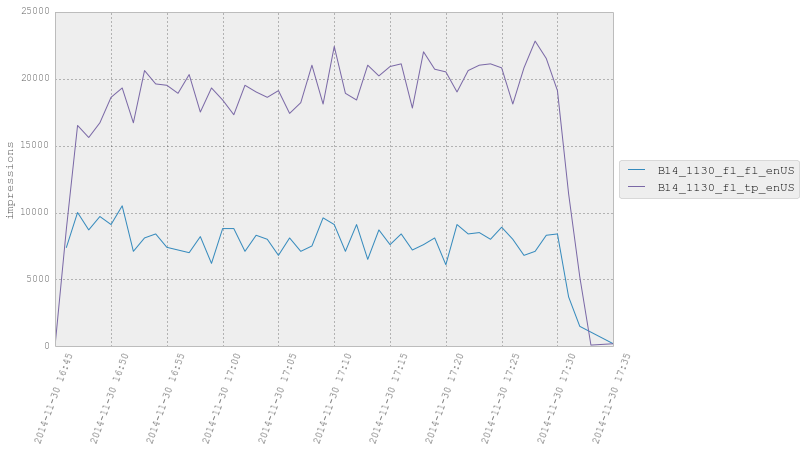

In [12]:
t.plot_impressions(a, b, smooth = 1, stop = '2014-11-30 17:35')

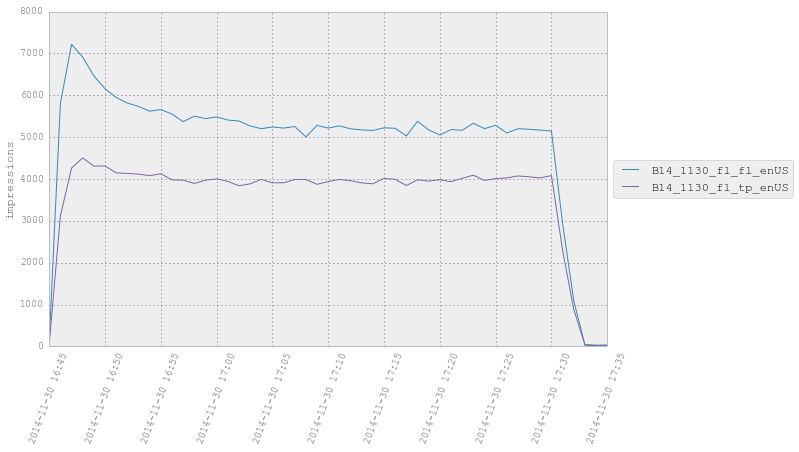

In [16]:
t_hive.plot_impressions(a, b, smooth = 1, stop = '2014-11-30 17:35')

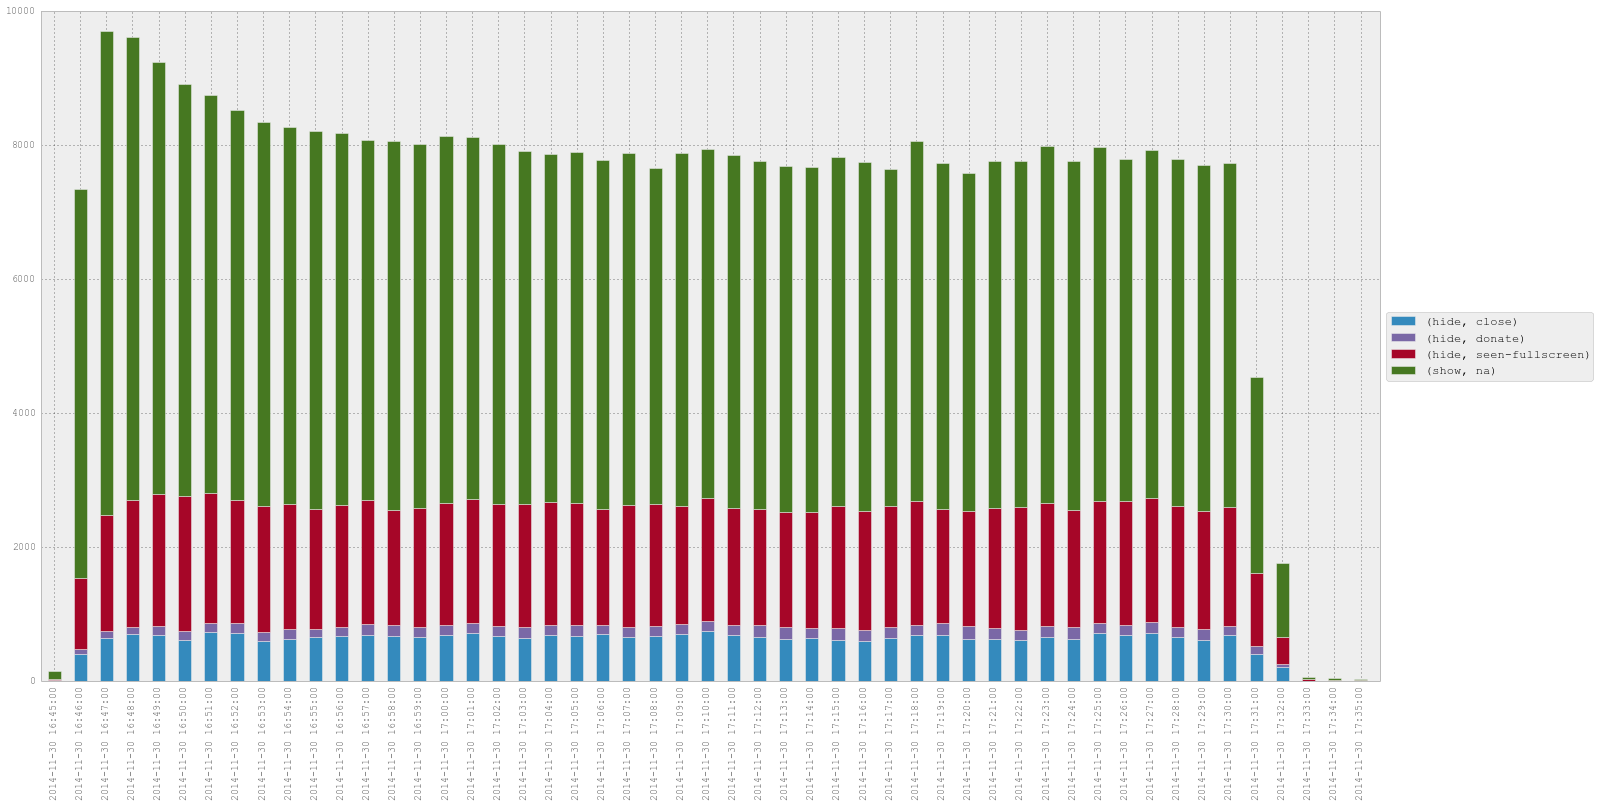

In [20]:
t_hive.plot_show_hide(a, stop = '2014-11-30 17:35')

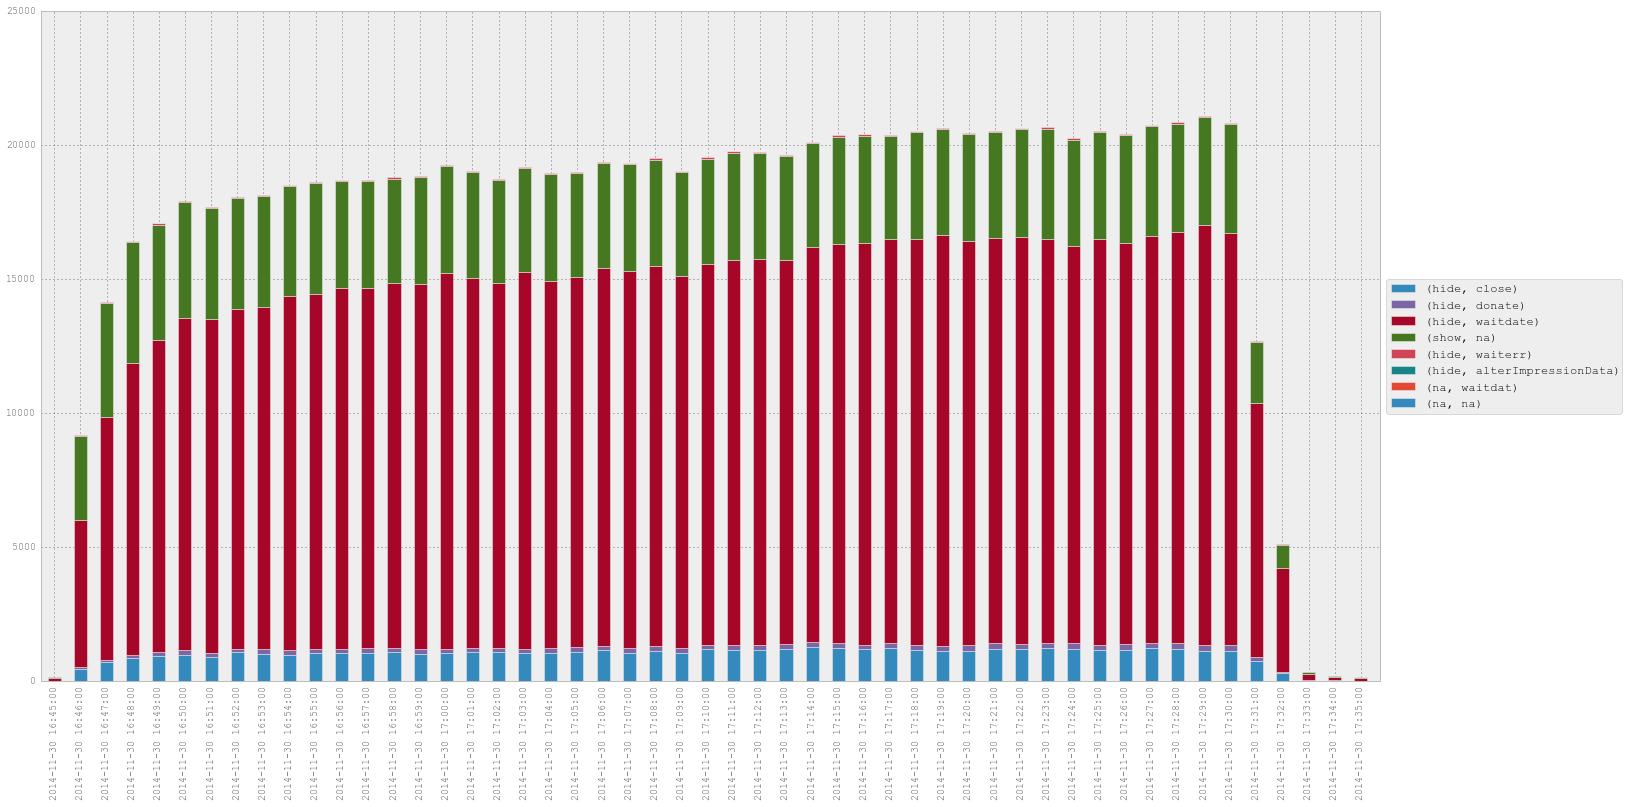

In [21]:
t_hive.plot_show_hide(b, stop = '2014-11-30 17:35')

In [43]:
t.rate_stats( a, b, conf = 90, rate = 'donations/impressions')

Testing Donations per Impressions
P(B14_1027_enUS_ipd_hl_ls better than B14_1027_enUS_ipd_hl_mr): 0.9993
Percent Lift B14_1027_enUS_ipd_hl_ls over B14_1027_enUS_ipd_hl_mr: (4.00%, 12.88%)
Rate CI B14_1027_enUS_ipd_hl_ls: (0.00013, 0.00014)
Rate CI B14_1027_enUS_ipd_hl_mr: (0.00012, 0.00013)


In [44]:
t.amount_stats( a, b, conf = 90, rate = 'donations/impressions')

B14_1027_enUS_ipd_hl_ls gives between $-0.0998 and $-0.0282 more $/1000 impressions than B14_1027_enUS_ipd_hl_mr


In [45]:
t.amount_stats( a, b, conf = 90, rate = 'donations/clicks')

B14_1027_enUS_ipd_hl_ls gives between $-9.3646 and $8.2806 more $/clicks than B14_1027_enUS_ipd_hl_mr


In [1]:
t.compare_donation_amounts(a, b )

NameError: name 't' is not defined

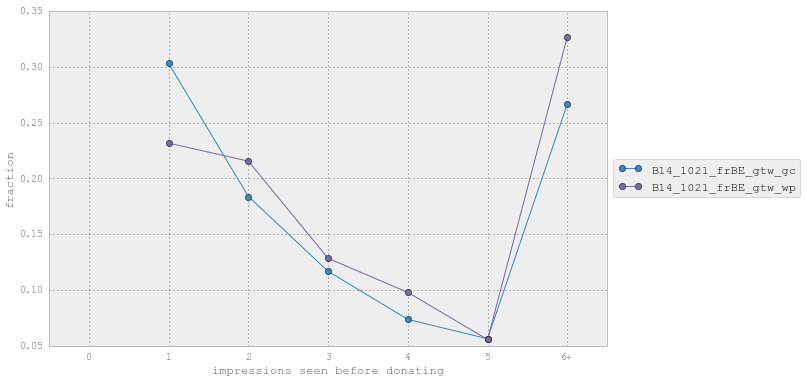

In [22]:
t.plot_utm_key(a, b, max_key = 5, normalize = True)

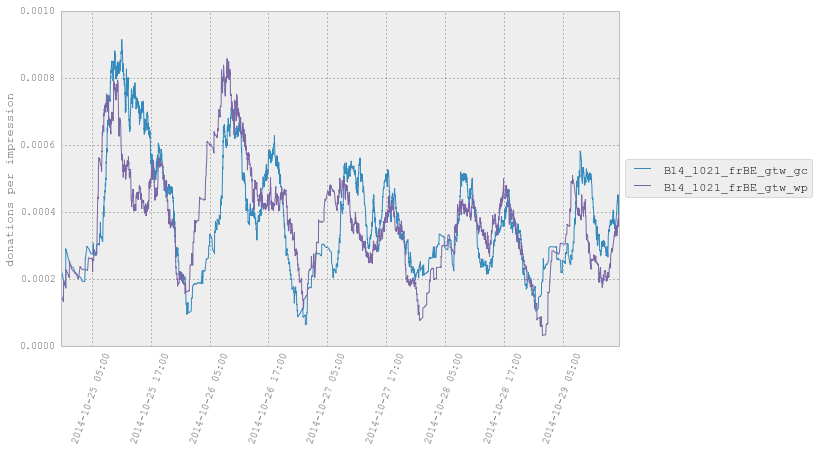

In [29]:
t.plot_donations_over_time(a, b, smooth = 100, amount = False)